## INTRODUCTION
Social media platforms have become integral parts of modern communication, providing individuals with the means to express their opinions, thoughts, and sentiments on a wide range of topics, including brands and current events. The vast amount of unstructured data generated on social media presents a valuable resource for businesses, researchers, and policymakers to gain insights into public sentiment and attitudes.
### BUSSINESS PROBLEM
This project focuses on the analysis and visualization of sentiment patterns in social media data, with the primary objective of understanding public opinion and attitudes towards specific topics or brands. By leveraging natural language processing (NLP) techniques and data visualization tools, we aim to extract meaningful insights from the vast sea of social media text.

### DATA
The data was obtained from kaggle  https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

### Importing Libraries

In [1]:

import pandas as pd
import numpy as np 
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
#creating column names
col_names = ['ID', 'Entity', 'Sentiment', 'Content']

### Loading Data

In [3]:
data = pd.read_csv('twitter_training.csv',names=col_names)
data

ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [4]:
#Display the first few rows
data.head()

ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [5]:
data.tail()

ID  Entity Sentiment  \
74677  9200  Nvidia  Positive   
74678  9200  Nvidia  Positive   
74679  9200  Nvidia  Positive   
74680  9200  Nvidia  Positive   
74681  9200  Nvidia  Positive   

                                                 Content  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...

In [6]:
data.columns

Index(['ID', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [7]:
data.shape

(74682, 4)

In [8]:
len(data)

74682

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Data Preprocessing

In [10]:
# A function to check for duplicates in our datasets
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(data)

The Data has 2700 duplicated rows.
This constitutes 3.615% of the data set.


In [11]:
data.drop_duplicates(keep='first')

ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[71982 rows x 4 columns]

In [12]:
identify_duplicates(data)

The Data has 2700 duplicated rows.
This constitutes 3.615% of the data set.


In [13]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = (missing_values / len(data)) * 100

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']
# Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(data))

Missing Values  % of Total
Content             686    0.918561

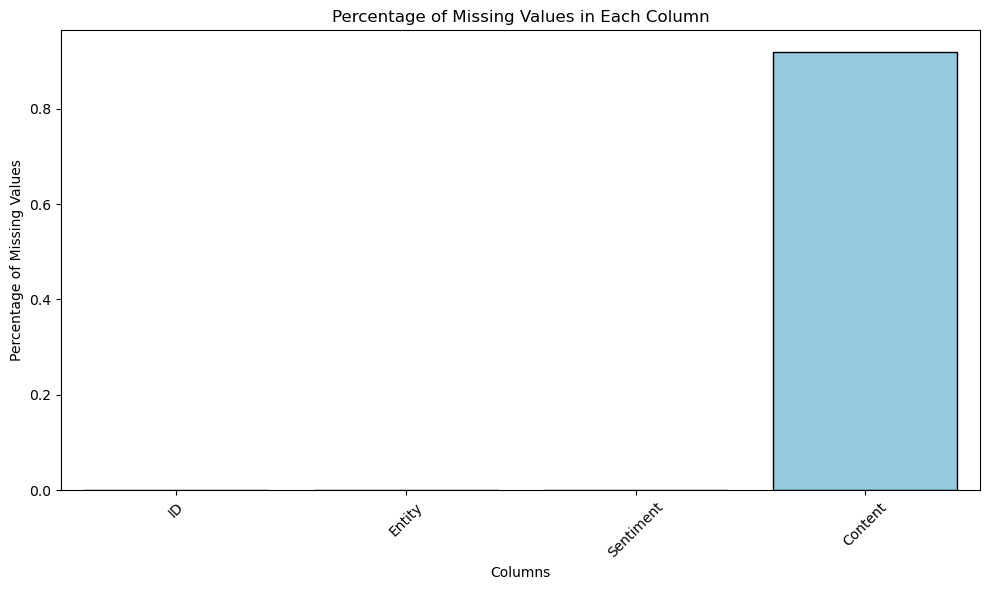

In [14]:
def visualize_missing_data(data):
    """
    Visualize the percentage of missing values in each column of the dataset.
    
    Parameters:
        data (pd.DataFrame): The dataset to be visualized.
    """
    # Calculate the percentage of missing values for each column
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    
    # Create a bar chart to visualize the percentage of missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue', edgecolor='black')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Percentage of Missing Values in Each Column')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize missing data using the function
visualize_missing_data(data)

In [15]:
data.dropna(subset = ['Content'],inplace=True)

In [16]:
# Check missing values in each dataset
display(check_missing_values(data))

Empty DataFrame
Columns: [Missing Values, % of Total]
Index: []

In [17]:
#Converting Irrelevant to Neutral
data['Sentiment'] = data['Sentiment'].replace('Irrelevant', 'Neutral')

In [18]:
data.drop(['ID','Entity'],axis=1)

Sentiment                                            Content
0      Positive  im getting on borderlands and i will murder yo...
1      Positive  I am coming to the borders and I will kill you...
2      Positive  im getting on borderlands and i will kill you ...
3      Positive  im coming on borderlands and i will murder you...
4      Positive  im getting on borderlands 2 and i will murder ...
...         ...                                                ...
74677  Positive  Just realized that the Windows partition of my...
74678  Positive  Just realized that my Mac window partition is ...
74679  Positive  Just realized the windows partition of my Mac ...
74680  Positive  Just realized between the windows partition of...
74681  Positive  Just like the windows partition of my Mac is l...

[73996 rows x 2 columns]

In [19]:
data.describe()

ID
count  73996.000000
mean    6430.279231
std     3737.660027
min        1.000000
25%     3194.000000
50%     6417.500000
75%     9595.000000
max    13200.000000

### EDA

In [20]:
vals = data['Sentiment'].value_counts()
label = ['Neutral', 'Negative', 'Positive']
color = ['Blue', 'Red', 'Green']
vals

Neutral     30983
Negative    22358
Positive    20655
Name: Sentiment, dtype: int64

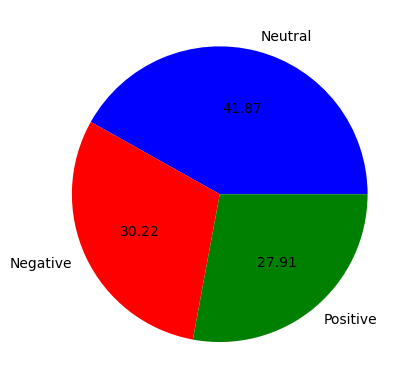

In [21]:
plt.pie(vals, labels=label, colors=color, autopct='%0.2f')
plt.show()

Observation

Neutral Sentiment: The "Neutral" category occupies the largest portion of the pie chart, indicating that it is the most common sentiment in the dataset. This suggests that a significant portion of the data is associated with neutral sentiments, which typically imply a lack of strong positive or negative feelings.

Negative Sentiment: The "Negative" category is the second most prevalent, though it is smaller than the "Neutral" category. This indicates that there is a substantial amount of data associated with negative sentiments, suggesting that there are instances of negative opinions or attitudes in your dataset.

Positive Sentiment: The "Positive" category is the smallest slice of the pie, indicating that it is the least common sentiment in your dataset. This suggests that positive sentiments are less frequent compared to neutral and negative sentiments.

In [22]:
top10_entity_counts = data['Entity'].value_counts().sort_values(ascending=False)[:10]

fig = px.bar(x=top10_entity_counts.index, 
             y=top10_entity_counts.values,
             color=top10_entity_counts.values,
             text=top10_entity_counts.values,
             color_continuous_scale='Blues')

fig.update_layout(
    title_text='Top 10 Twitter Entity Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Entity',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()

The entity with the highest frequency of mentions is positioned on the left side of the chart, and the frequency decreases as you move to the right.

In [23]:
# download pukt for tokenzation
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lavender\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
data['num_char'] = data['Content'].apply(len) # no of characters of each text

In [25]:
data.head()

ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  num_char  
0  im getting on borderlands and i will murder yo...        53  
1  I am coming to the borders and I will kill you...        51  
2  im getting on borderlands and i will kill you ...        50  
3  im coming on borderlands and i will murder you...        51  
4  im getting on borderlands 2 and i will murder ...        57

In [26]:
# number of words
data['num_words'] = data['Content'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
data.head()

ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  num_char  num_words  
0  im getting on borderlands and i will murder yo...        53         11  
1  I am coming to the borders and I will kill you...        51         13  
2  im getting on borderlands and i will kill you ...        50         11  
3  im coming on borderlands and i will murder you...        51         11  
4  im getting on borderlands 2 and i will murder ...        57         13

In [28]:
# number of sentences
data['num_sentences'] = data['Content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
data.head()

ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  num_char  num_words  \
0  im getting on borderlands and i will murder yo...        53         11   
1  I am coming to the borders and I will kill you...        51         13   
2  im getting on borderlands and i will kill you ...        50         11   
3  im coming on borderlands and i will murder you...        51         11   
4  im getting on borderlands 2 and i will murder ...        57         13   

   num_sentences  
0              1  
1              1  
2              1  
3              1  
4              1

In [30]:
# data description
data[['num_char','num_words','num_sentences']].describe()

num_char     num_words  num_sentences
count  73996.000000  73996.000000   73996.000000
mean     108.783650     22.576964       1.853222
std       79.524212     17.146458       1.409892
min        1.000000      0.000000       0.000000
25%       47.000000     10.000000       1.000000
50%       91.000000     18.000000       1.000000
75%      153.000000     32.000000       2.000000
max      957.000000    198.000000      25.000000

<AxesSubplot:xlabel='num_char', ylabel='Count'>

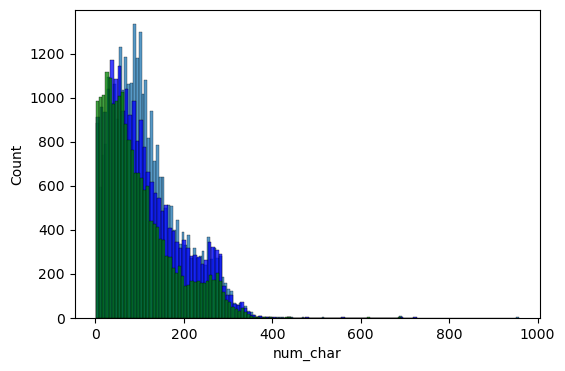

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(data[data['Sentiment'] == 'Neutral']['num_char'])
sns.histplot(data[data['Sentiment'] == 'Negative']['num_char'], color='blue')
sns.histplot(data[data['Sentiment'] == 'Positive']['num_char'], color='green')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

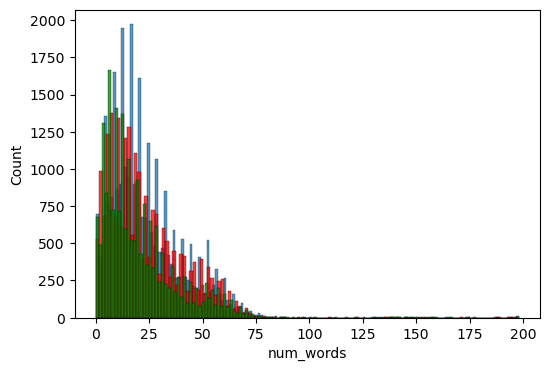

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(data[data['Sentiment'] == 'Neutral']['num_words'])
sns.histplot(data[data['Sentiment'] == 'Negative']['num_words'], color='red')
sns.histplot(data[data['Sentiment'] == 'Positive']['num_words'], color='green')

In [33]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(data, columns=['Sentiment'],drop_first=True)
df_encoded['Sentiment_Neutral'] = df_encoded['Sentiment_Neutral'].astype(int)
df_encoded['Sentiment_Positive'] = df_encoded['Sentiment_Positive'].astype(int)

In [34]:
df_encoded=df_encoded.drop(['Content'],axis=1)

<AxesSubplot:>

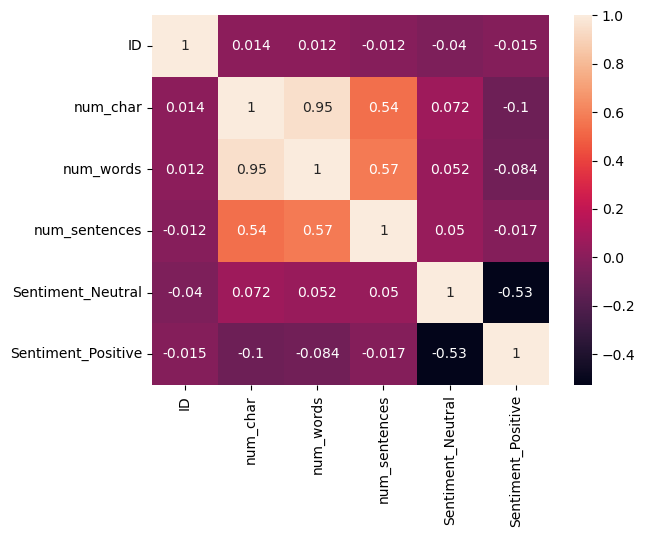

In [35]:
sns.heatmap(df_encoded.corr(),annot=True)

## Text Preprocessing¶

1. Lower Case
2. Tokenization
3. Removing Special Character
4. Removing stop words and puntuations
5. Stemming

In [36]:
# string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] # list is mutable, so you have to do cloning, else if you clear y, text gets cleared too
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [37]:
# Perform Label encoding
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['Sentiment'])

In [38]:
data.head()

ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  num_char  num_words  \
0  im getting on borderlands and i will murder yo...        53         11   
1  I am coming to the borders and I will kill you...        51         13   
2  im getting on borderlands and i will kill you ...        50         11   
3  im coming on borderlands and i will murder you...        51         11   
4  im getting on borderlands 2 and i will murder ...        57         13   

   num_sentences  sentiment_encoded  
0              1                  2  
1              1                  2  
2              1                  2  
3              1                  2  
4              1                  2

In [39]:
import string # for punctuation
data['transformed_text'] = data['Content'].apply(transform_text)

In [40]:
data.head()

ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  num_char  num_words  \
0  im getting on borderlands and i will murder yo...        53         11   
1  I am coming to the borders and I will kill you...        51         13   
2  im getting on borderlands and i will kill you ...        50         11   
3  im coming on borderlands and i will murder you...        51         11   
4  im getting on borderlands 2 and i will murder ...        57         13   

   num_sentences  sentiment_encoded            transformed_text  
0              1                  2    im get borderland murder  
1              1                  2            come border kill  
2              1                  2      im get borderland kill  
3              1                  2   im come borderland murder  
4              1                  2  im get borderland 2 murder

In [41]:
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='black')
wc

In [42]:
condition = (data['sentiment_encoded']==0)

# Generate the word cloud for "transformed_text" when both conditions are met
wcNeutral = WordCloud().generate(data[condition]['transformed_text'].str.cat(sep=" "))

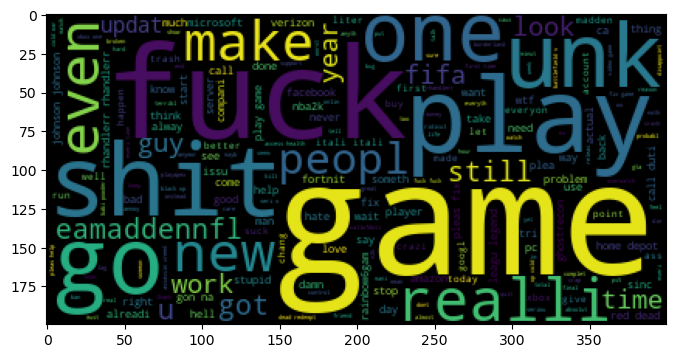

In [43]:
plt.figure(figsize=(8,8))
plt.imshow(wcNeutral)

In [44]:
condition = (data['sentiment_encoded']==1)

# Generate the word cloud for "transformed_text" when both conditions are met
wcNegative = WordCloud().generate(data[condition]['transformed_text'].str.cat(sep=" "))

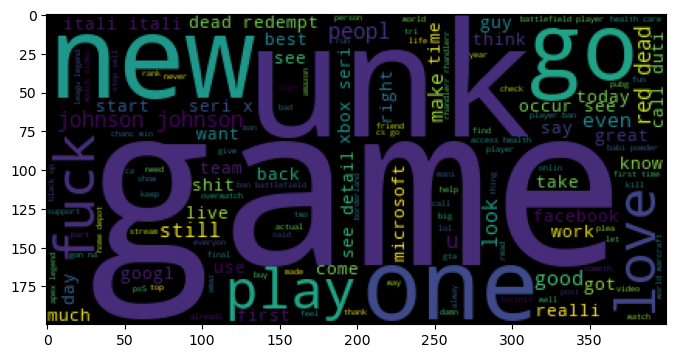

In [45]:
plt.figure(figsize=(8,8))
plt.imshow(wcNegative)

In [46]:
condition = (data['sentiment_encoded']==2)

# Generate the word cloud for "transformed_text" when both conditions are met
wcPositive = WordCloud().generate(data[condition]['transformed_text'].str.cat(sep=" "))

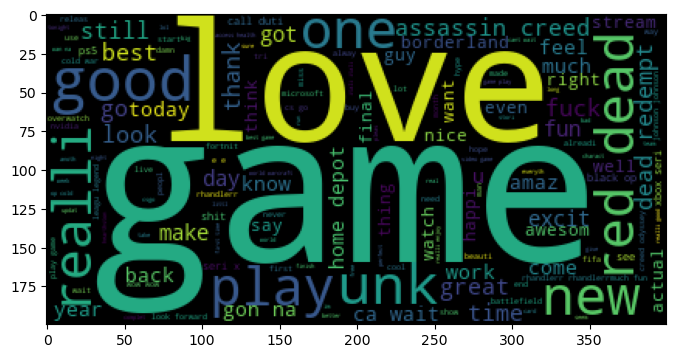

In [47]:
plt.figure(figsize=(8,8))
plt.imshow(wcPositive)

#### Building the Model

In [48]:
data=data.drop(['Sentiment'],axis=1)

In [49]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [50]:
print(X.shape)

(73996, 3000)


In [51]:
y = data['sentiment_encoded'].values

In [52]:
print(y.shape)

(73996,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### Evaluation

In [54]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

bnb = BernoulliNB()

In [55]:
# TFIDF Vectorizer - BernoulliNB
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(precision_score(y_test,y_pred,average=None))

[0.69501612 0.68162111 0.54595386]


In [56]:
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
# Create a pipeline with just the logistic regression classifier
pipeline = Pipeline([
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# defining the hyperparameter grid for logistic regression (C parameter)
params = {'lr_clf__C': [1, 5, 10]}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print('Optimized Hyperparameters:', grid_cv_pipe.best_params_)

pred = grid_cv_pipe.predict(X_test)
print('Optimized Accuracy Score: {0: .3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Optimized Hyperparameters: {'lr_clf__C': 10}
Optimized Accuracy Score:  0.695


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66      4503
           1       0.68      0.58      0.63      6186
           2       0.55      0.73      0.62      4111

    accuracy                           0.64     14800
   macro avg       0.64      0.64      0.64     14800
weighted avg       0.65      0.64      0.64     14800



### Conclusion:

In this analysis, we applied machine learning models, including Bernoulli Naive Bayes and Logistic Regression, to perform sentiment analysis on a dataset. We evaluated the models' performance using precision scores and found that the Bernoulli Naive Bayes model achieved precision scores of approximately 0.70 for class 0 (Negative sentiment), 0.68 for class 1 (Neutral sentiment), and 0.55 for class 2 (Positive sentiment).

Additionally, I optimized a Logistic Regression model using grid search and found the best hyperparameter configuration with a C value of 10. The optimized model achieved an accuracy score of approximately 0.695 on the test data.When considering the precision, recall, and F1-score metrics, the models demonstrated reasonable performance in classifying sentiments. 

### Recommendations:

Feature Engineering: Consider exploring additional features or feature engineering techniques to improve model performance. Text data often benefits from advanced text preprocessing, such as stemming, lemmatization, and handling of stopwords.

Model Selection: Experiment with other machine learning algorithms or deep learning models like LSTM or Transformer-based models (e.g., BERT) to potentially achieve better sentiment classification results.

Data Augmentation: Augmenting the dataset with more diverse and representative samples can help improve the model's ability to generalize to a wider range of sentiments and language styles.

Hyperparameter Tuning: Continue to fine-tune hyperparameters of the chosen models to optimize their performance further. Grid search and randomized search are useful techniques for this purpose.

### Next Steps
Data Enrichment: Collect more data if possible, or consider using external data sources to enrich your dataset. Additional data can improve model performance and provide more comprehensive insights into sentiment trends.

Advanced Text Preprocessing: Implement advanced text preprocessing techniques such as lemmatization, stemming, and handling of special characters and emojis. This can help in capturing more nuanced sentiment expressions.

Word Embeddings: Utilize word embeddings such as Word2Vec, GloVe, or fastText to represent words as dense vectors. These embeddings can capture semantic relationships between words and improve model accuracy.

Deep Learning Models: Explore deep learning models like Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs), including Long Short-Term Memory (LSTM) networks, for sentiment analysis. These models have shown excellent performance in natural language processing tasks.

Transfer Learning: Consider using pre-trained language models like BERT, GPT-3, or RoBERTa, fine-tuned for sentiment analysis. Transfer learning can save time and resources while improving accuracy.

### THANK YOU